In [18]:
%pip install pandas
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
     ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
     ----- ---------------------------------- 0.2/1.5 MB 6.9 MB/s eta 0:00:01
     ----------------- ---------------------- 0.7/1.5 MB 8.3 MB/s eta 0:00:01
     ---------------------------- ----------- 1.1/1.5 MB 8.5 MB/s eta 0:00:01
     ------------------------------------ --- 1.4/1.5 MB 8.0 MB/s eta 0:00:01
     ---------------------------------------- 1.5/1.5 MB 7.4 MB/s eta 0:00:00
     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     ---------------------------------------- 42.0/42.0 kB 2.1 MB/s eta 0:00:00
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ---------------------------------------- 57.6/57.6 kB ? eta 0:00:00
   ---------------------------------------- 0.0/269.6 kB ? eta -:--:--
   ---------------------------------------- 269.6/269.6 kB 8.4 MB/s eta 0:00:00
   ----------------------

In [2]:
import sqlite3
import pandas as pd

db_path = 'gmail_data.db'
connection = sqlite3.connect(db_path, uri=True)
# Check if the connection is successful
if connection:
    print("Connection successful")
else:
    print("Connection failed")

cursor = connection.cursor()
cursor.execute('SELECT * FROM \'emails\';')
data = cursor.fetchall()

df = pd.DataFrame(data, columns=['message_id', 'date_received', 'from_email', 'domain_origin', 'size_of_email', 'has_attachments', 'subject']) 

Connection successful


In [7]:
# Display basic statistics for each numeric column
print(df.describe())

       date_received  size_of_email  has_attachments
count   6.273300e+04   6.273300e+04     62733.000000
mean    1.514037e+12   5.477988e+04         0.809112
std     1.259552e+11   1.687824e+05         0.393004
min     1.042808e+12   2.950000e+02         0.000000
25%     1.427329e+12   1.250600e+04         1.000000
50%     1.528209e+12   3.031800e+04         1.000000
75%     1.618672e+12   5.514000e+04         1.000000
max     1.700838e+12   3.140210e+06         1.000000


In [8]:
# Display counts of unique values in a specific column
print(df['domain_origin'].value_counts())

domain_origin
amazon.com               8229
gmail.com                6830
github.com               2893
msn.com                  1530
notify.wellsfargo.com    1488
                         ... 
microcenterorder.com        1
US.EXEL.COM                 1
ci.apple-valley.mn.us       1
norwex.com                  1
healthpartners.com          1
Name: count, Length: 2283, dtype: int64


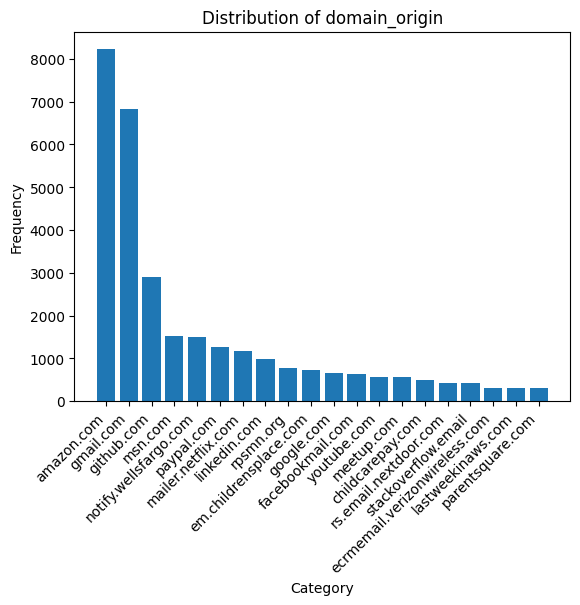

In [16]:
value_counts = df['domain_origin'].value_counts().head(20)
plt.bar(value_counts.index, value_counts.values)
plt.title('Distribution of domain_origin')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

In [ ]:
%pip install nltk

import nltk

from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with a 'subject' and 'size_of_email' column
# Replace 'subject' and 'size_of_email' with the actual column names

# Tokenization
nltk.download('punkt')  # Download the NLTK tokenizer data
df['tokenized_text'] = df['subject'].apply(lambda x: word_tokenize(str(x).lower()))

# Word Frequency
all_words = [word for tokens in df['tokenized_text'] for word in tokens]
fdist = FreqDist(all_words)

# Visualization (Top N words)
plt.figure(figsize=(12, 6))
fdist.plot(30, cumulative=False)
plt.title('Top 30 Most Frequent Words')
plt.show()

# Relationship between Size of Email and Word Frequency
plt.scatter(df['size_of_email'], df['tokenized_text'].apply(lambda x: sum([fdist[word] for word in x])))
plt.xlabel('Size of Email')
plt.ylabel('Total Word Frequency')
plt.title('Relationship between Size of Email and Word Frequency')
plt.show()

In [28]:
%pip install scikit-learn

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression

# Feature Extraction
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_text = vectorizer.fit_transform(df['subject'].astype(str)).toarray()

# Additional Feature
X_additional_feature = df['from_email'].values.reshape(-1, 1)

# Combine Text Features and Additional Feature
X_combined = pd.concat([pd.DataFrame(X_text, columns=vectorizer.get_feature_names_out()), pd.DataFrame(X_additional_feature, columns=['from_email'])], axis=1)


# Target Variable
y = df['size_of_email']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Get feature names and coefficients
feature_names = vectorizer.get_feature_names_out()
coefficients = model.coef_

# Create a DataFrame to display terms and their corresponding coefficients
terms_coefficients_df = pd.DataFrame({'Term': feature_names, 'Coefficient': coefficients})

# Sort DataFrame by absolute coefficient values to highlight important terms
terms_coefficients_df = terms_coefficients_df.reindex(terms_coefficients_df['Coefficient'].abs().sort_values(ascending=False).index)

# Display the top N terms and their coefficients
top_n_terms = 50  # Adjust as needed
print(terms_coefficients_df.head(top_n_terms))

Note: you may need to restart the kernel to use updated packages.
               Term   Coefficient
675           becas -7.773485e+18
2347            ime  7.773485e+18
4192        spartan -7.354877e+18
83             1711  7.013195e+18
164            2711  6.615941e+18
3055           naya -4.945064e+18
666              bd  4.945064e+18
2325            ibr -3.806578e+18
2329            icr  3.806578e+18
3235        overage  3.745592e+18
3727           rema -3.701330e+18
546       artículos -3.606219e+18
1482    disponibles  3.606219e+18
3139             nw -3.591262e+18
234            4610  3.591262e+18
2812        marcelo -3.474076e+18
3547       promotor  3.474076e+18
4144        smarttv -2.615526e+18
1882          fgl27  2.615526e+18
2793          malla -2.058237e+18
2938         minesh  2.058237e+18
169         2815400 -1.960173e+18
208         3753322  1.960173e+18
816            bref -1.941545e+18
4004        semaine  1.941545e+18
1363       declares -1.738682e+18
1644          em

## Using OneHotEncoder

In [13]:
nan_counts = df.isna().sum()
print(nan_counts)

message_id           0
date_received        0
from_email           0
domain_origin        0
size_of_email        0
has_attachments      0
subject            412
dtype: int64


In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression


# Separate features and target variable
X = df[['from_email', 'subject']]
y = df['size_of_email']
print(type(X))
print(type(y))

# Preprocessing pipeline for text data
text_preprocessor = Pipeline(steps=[
    # ('imputer', SimpleImputer(strategy='constant', fill_value='')),  # Replace missing values with an empty string
    ('tfidf', TfidfVectorizer(max_features=5000, stop_words='english'))
])
print(text_preprocessor)


# Preprocessing pipeline for from_email (one-hot encoding)
email_preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='unknown')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # handle_unknown='ignore' to handle unseen categories in test data
])

# Column transformer to apply different preprocessing to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('text', text_preprocessor, ['subject']),
        ('email', email_preprocessor, ['from_email'])
    ],
    remainder='passthrough'  # Include the remaining columns without transformation
)


# Full pipeline including preprocessing and model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)


# Get feature names and coefficients
text_feature_names = text_preprocessor.named_steps['tfidf'].get_feature_names_out()
email_feature_names = model.named_steps['preprocessor'].named_transformers_['email'].named_steps['onehot'].get_feature_names_out()
feature_names = text_feature_names + list(email_feature_names)
coefficients = model.named_steps['regressor'].coef_

# Create a DataFrame to display terms and their corresponding coefficients
terms_coefficients_df = pd.DataFrame({'Term': feature_names, 'Coefficient': coefficients})

# Sort DataFrame by absolute coefficient values to highlight important terms
terms_coefficients_df = terms_coefficients_df.reindex(terms_coefficients_df['Coefficient'].abs().sort_values(ascending=False).index)

# Display the top N terms and their coefficients
top_n_terms = 20  # Adjust as needed
print(terms_coefficients_df.head(top_n_terms))


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=5000, stop_words='english'))])


ValueError: Mismatching dimensions along axis 0: {1, 50186}